## Basic analysis for M/EEG data

### Welcome! The goal of this notebook is to run some simple pre-processing analyses for M/EEG data! 

#### 1. First, start by downloading some sample data. 

For a start, you can find an exemplar oddball dataset including EEG and MEG responses described here: 
http://www.fieldtriptoolbox.org/tutorial/natmeg/dataset
and the data (.fif file) can be found here: 
ftp://ftp.fieldtriptoolbox.org/pub/fieldtrip/tutorial/natmeg

Once you've downloaded the data and placed them in a folder, you can start by defining the path where your data are stored, in "rawdata_path":

In [2]:
import mne, numpy as np, matplotlib.pyplot as plt
rawdata_path = "/Users/ath/Documents/OpenMEEG/"

filen = "oddball1_mc_downsampled.fif"

#### 2. Now it's time to go to "mne" functions to load the data & grab the information structure & events.
You can find more information about MNE here: https://martinos.org/mne/dev/index.html

In [3]:
raw = mne.io.read_raw_fif(rawdata_path+filen, preload = True)
info = mne.io.read_info(rawdata_path+filen)
events = mne.find_events(raw)

Opening raw data file /Users/ath/Documents/OpenMEEG/oddball1_mc_downsampled.fif...
This filename (/Users/ath/Documents/OpenMEEG/oddball1_mc_downsampled.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
    Range : 12500 ... 256499 =     50.000 ...  1025.996 secs
Ready.
Current compensation grade : 0
Reading 0 ... 243999  =      0.000 ...   975.996 secs...


<ipython-input-3-5ac0b0e20519>:1: RuntimeWarning: This filename (/Users/ath/Documents/OpenMEEG/oddball1_mc_downsampled.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw = mne.io.read_raw_fif(rawdata_path+filen, preload = True)


700 events found
Events id: [1 2 5]


#### 3. Trial extraction
Now, we can extract trials. According to the data description, a code of "1" corresponds to standard and a code of "2" to deviant trials. We specify that in the form of a dictionary, called "events_renamed":

In [4]:
tmin, tmax = -0.05, 0.3
events_renamed = {'Standard': 1, 'Deviant': 2}
# Only pick MEG and EOG channels.
picks = mne.pick_types(raw.info, eeg=True)

trials = mne.Epochs(raw, events=events, event_id=events_renamed, tmin=tmin,
                    tmax=tmax, picks=picks, preload=True)

600 matching events found
0 projection items activated
Loading data for 600 events and 88 original time points ...
0 bad epochs dropped


#### 4. Averaging and splitting data by condition

Now we are ready to split data according to conditions and plot mean event-related potentials:

In [5]:
standard_trials = trials['Standard'].average()
deviant_trials = trials['Deviant'].average()

#### 5. Plotting average reponses!

And after all this work it's time to plot some average EEG and MEG responses:

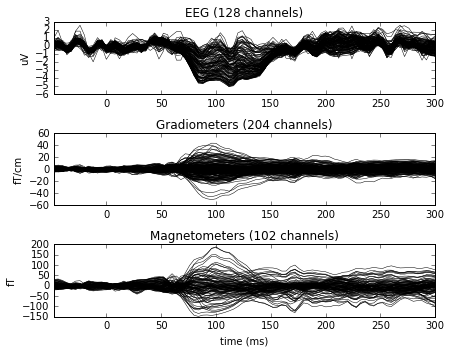

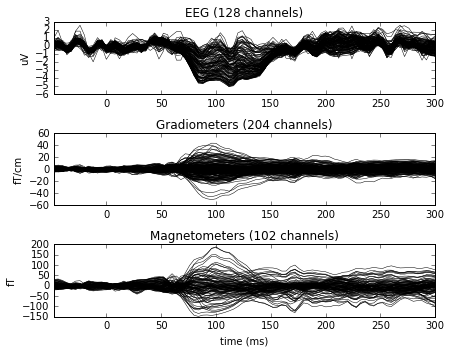

In [8]:
%matplotlib inline

standard_trials.plot()